In [1]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [2]:
# cap = cv2.VideoCapture(1)
# with mp_holistics.Holistic(
#     min_detection_confidence=0.8,
#     min_tracking_confidence=0.8
# ) as holistic:
#     while cap.isOpened():
#         success,image=cap.read()
#         cv2.imshow('Webcam', image)
#         if not success:
#             print('Ignoring empty frames')
#             continue
#         image.flags.writeable = False
#         # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#         print(result)
#         break
# cap.release()


In [8]:
# For webcam input:
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # # Draw landmark annotation on the image.
    # image.flags.writeable = True
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # mp_drawing.draw_landmarks(
    #     image,
    #     results.face_landmarks,
    #     mp_holistic.FACEMESH_CONTOURS,
    #     landmark_drawing_spec=None,
    #     connection_drawing_spec=mp_drawing_styles
    #     .get_default_face_mesh_contours_style())
    # mp_drawing.draw_landmarks(
    #     image,
    #     results.pose_landmarks,
    #     mp_holistic.POSE_CONNECTIONS,
    #     landmark_drawing_spec=mp_drawing_styles
    #     .get_default_pose_landmarks_style())
    # # Flip the image horizontally for a selfie-view display.
    # cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    # if cv2.waitKey(5) & 0xFF == 27:
    break
cap.release()


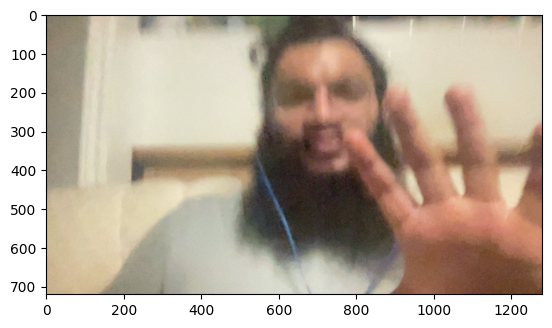

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image)


In [10]:
results.face_landmarks


landmark {
  x: 0.561786
  y: 0.43617898
  z: -0.029749017
}
landmark {
  x: 0.55948275
  y: 0.3825772
  z: -0.049357742
}
landmark {
  x: 0.5601564
  y: 0.40027887
  z: -0.02828523
}
landmark {
  x: 0.54915214
  y: 0.33360308
  z: -0.034472268
}
landmark {
  x: 0.5586847
  y: 0.36589256
  z: -0.051606663
}
landmark {
  x: 0.5576126
  y: 0.34560272
  z: -0.046773344
}
landmark {
  x: 0.55528104
  y: 0.298829
  z: -0.019526554
}
landmark {
  x: 0.49008772
  y: 0.31323993
  z: 0.01606192
}
landmark {
  x: 0.5537687
  y: 0.26274514
  z: -0.010687057
}
landmark {
  x: 0.5529129
  y: 0.24081819
  z: -0.010515196
}
landmark {
  x: 0.5493511
  y: 0.15871774
  z: 0.004981552
}
landmark {
  x: 0.5620601
  y: 0.4439578
  z: -0.029025605
}
landmark {
  x: 0.56220007
  y: 0.45042723
  z: -0.026626976
}
landmark {
  x: 0.5622351
  y: 0.4535523
  z: -0.02302088
}
landmark {
  x: 0.56344837
  y: 0.47733986
  z: -0.018903835
}
landmark {
  x: 0.56382656
  y: 0.48456725
  z: -0.020720921
}
landmark {
 

In [15]:
face = pd.DataFrame()
pose = pd.DataFrame()
left_hand = pd.DataFrame()
right_hand = pd.DataFrame()
if results.face_landmarks:
    for i, point in enumerate(results.face_landmarks.landmark):
        face.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
if results.pose_landmarks:
    for i , point in enumerate(results.pose_landmarks.landmark):
        pose.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]
if results.left_hand_landmarks:
    for i, point in enumerate(results.left_hand_landmarks.landmark):
        left_hand.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
if results.right_hand_landmarks:
    for i, point in enumerate(results.right_hand_landmarks.landmark):
        right_hand.loc[i, ['x', 'y', 'z']] = [point.x, point.y, point.z]            

In [93]:
## new dataset


# landmarks = pd.DataFrame()
# if results.face_landmarks:
#         for i, point in enumerate(results.face_landmarks.landmark):         
#                 landmarks.loc[0, [f"x_face_{i}",f"y_face_{i}",f"z_face_{i}"]] = [point.x, point.y, point.z]
# if results.pose_landmarks:
#         for i, point in enumerate(results.pose_landmarks.landmark):
#                 landmarks.loc[0, [f"x_pose_{i}",f"y_pose_{i}",f"z_pose_{i}"]]= [point.x, point.y, point.z]
# if results.left_hand_landmarks:
#         for i, point in enumerate(results.left_hand_landmarks.landmark):        
#                 landmarks.loc[0, [f"x_left_hand_{i}",f"y_left_hand_{i}",f"z_left_hand_{i}"]] = [point.x, point.y, point.z]
# if results.right_hand_landmarks:
#         for i, point in enumerate(results.right_hand_landmarks.landmark):
#                 landmarks.loc[0, [f"z_right_hand_{i}",f"z_right_hand_{i}",f"z_right_hand_{i}"]] = [point.x, point.y, point.z] 

#         # landmarks.loc[0, f"y_face_{i}"] = point.y 
#         # landmarks.loc[0, f"z_face_{i}"] = point.z

    


In [26]:
# len(landmarks.columns)

NameError: name 'landmarks' is not defined

<Axes: xlabel='x', ylabel='y'>

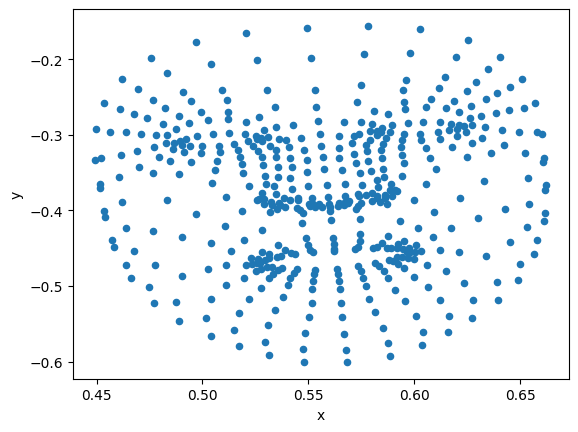

In [12]:
face['y'] = -face['y']
face.plot(x='x', y='y', kind='scatter')

In [13]:
ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

In [30]:
## kaggle data
train = pd.read_csv('train.csv.zip')
pq_file = "train_landmark_files/16069/100015657.parquet"
xyz = pd.read_parquet(pq_file)

In [22]:
train.query("sequence_id==100015657")

,path,participant_id,sequence_id,sign
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud


In [35]:
xyz.query('frame==103')['type'].value_counts()

type
face          468
pose           33
left_hand      21
right_hand     21
Name: count, dtype: int64

In [25]:
xyz_np = load_relevant_data_subset(pq_file)

In [28]:
xyz_np.shape

(105, 543, 3)